<a href="https://colab.research.google.com/github/angel870326/Hierarchical-Clustering/blob/main/word_cloud_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 2022.04.05 Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

#**Word Cloud for Clusters**



####**Contents:**

1. Create a DataFrame for Each Cluster<br/>
2. Functions<br/>
3. Word Cloud<br/>
4. Cluster Comparison by Weights<br/>

<br/>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from PIL import Image
import os
from os import path

In [ ]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
font = 'TaipeiSansTCBeta-Regular.ttf'

In [ ]:
# !wget -O house.png https://yoshinoya.com.tw/wp-content/uploads/2020/04/house.png

!wget -O house.jpeg 'https://drive.google.com/file/d/1gv4KZOywnkQkfm3vW1qXX_0hT9l9Ub-T/view?usp=sharing'
image = "house.jpeg"
# d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
# mask = np.array(Image.open(path.join(d, "house.jpeg")))


In [ ]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


##**1. Create a DataFrame for Each Cluster**


---



In [ ]:
data = pd.read_csv('/content/gdrive/Shareddrives/Capstone/分群結果/hierarchical_textcluster.csv')
cluster_complete_3 = data[['c0101', 'content', 'cluster_complete_3']]
cluster_complete_5 = data[['c0101', 'content', 'cluster_complete_5']]
cluster_avg_3 = data[['c0101', 'content', 'cluster_avg_3']]
cluster_avg_6 = data[['c0101', 'content', 'cluster_avg_6']]
cluster_ward_3 = data[['c0101', 'content', 'cluster_ward_3']]
cluster_ward_4 = data[['c0101', 'content', 'cluster_ward_4']]

cluster_complete_3

,c0101,content,cluster_complete_3
0,0000001,"西南,24小時,重點,三十一年至三十五年屋齡,少戶數,鋼筋混凝土,小公設比,近一年有實價登錄...",3
1,0000008,"西南,24小時,一般,二十六年至三十年屋齡,少戶數,鋼筋混凝土,中公設比,近一年無實價登錄,...",1
2,0000010,"東北,24小時,重點,二十六年至三十年屋齡,極多戶數,鋼骨鋼筋混凝土,小公設比,近一年有實價...",1
3,0000011,"西南,日間管理,一般,二十六年至三十年屋齡,少戶數,鋼筋混凝土,中公設比,近一年有實價登錄,...",1
4,0000012,"東北,24小時,重點,二十六年至三十年屋齡,極多戶數,鋼筋混凝土,中公設比,近一年無實價登錄...",1
...,...,...,...
18191,Y001265,"南,24小時,重點,十一年至十五年屋齡,少戶數,鋼筋混凝土,中公設比,近一年有實價登錄,臨多...",1
18192,Y001266,"北,24小時,重點,六年至十年屋齡,多戶數,鋼筋混凝土,大公設比,近一年有實價登錄,有平面車...",1
18193,Y001273,"西,24小時,重點,十一年至十五年屋齡,極少戶數,鋼筋混凝土,大公設比,近一年無實價登錄,有...",1
18194,Y001276,"24小時,一般,十一年至十五年屋齡,極少戶數,鋼筋混凝土,中公設比,近一年有實價登錄,臨多線...",1


##**2. Functions**


---



In [ ]:
# Build a dataframe for a cluster 
def clusterdf(method,column,clusterID):
  return method[method[column] == clusterID]

# Extract all the contents from a cluster
def textList(cluster):
  text_list = cluster.iloc[0,1]
  for i in range(1,len(cluster.index)-1):
    text_list = text_list + ',' + cluster.iloc[i,1]
  text_list = text_list.split(',')
  return text_list

# Word cloud
def createWordCloud(dictionary):
  # mask = np.array(Image.open(image))
  # mask = imageio.imread("house.jpeg")
  # return WordCloud(margin=0, font_path=font, background_color='white').generate_from_frequencies(dictionary)
  return WordCloud(margin=0, font_path=font, background_color='white').generate_from_frequencies(dictionary)

# Show Cloud
def showWordCloud(cloud):
  plt.figure(figsize=(10, 5))
  plt.axis("off")
  plt.imshow(cloud, interpolation='bilinear')


##**3. Word Cloud**


---



###**3.1 Complete-Link Cluster**

####3 clusters

complete3_1 size:  9392
complete3_2 size:  2274
complete3_3 size:  6530


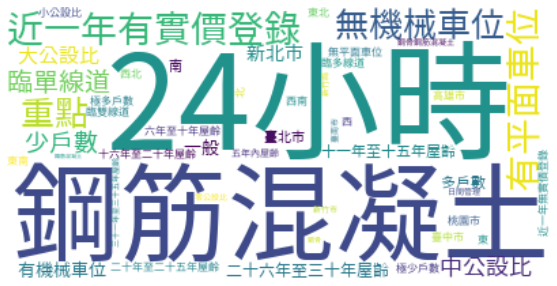

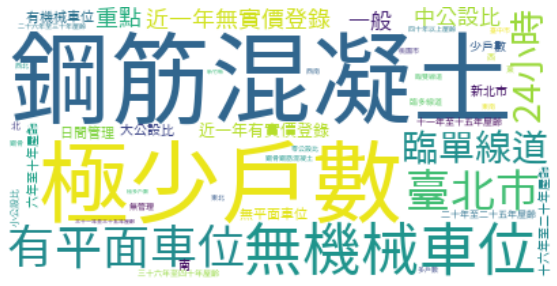

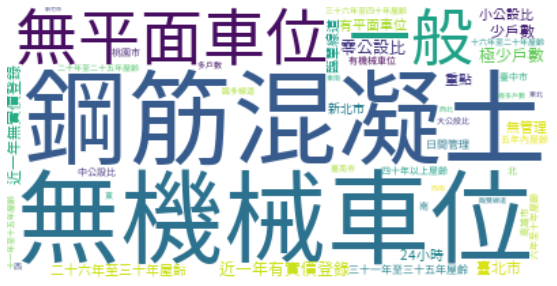

In [ ]:
complete3_1 = clusterdf(cluster_complete_3,'cluster_complete_3',1)
complete3_2 = clusterdf(cluster_complete_3,'cluster_complete_3',2)
complete3_3 = clusterdf(cluster_complete_3,'cluster_complete_3',3)

# Cluster 1
print("complete3_1 size: ", len(complete3_1.index))
text_c3_1 = textList(complete3_1)
dict_c3_1 = Counter(text_c3_1)

wordcloud_c3_1 = createWordCloud(dict_c3_1)
wordcloud_c3_1.words_ # check all the words with associated weights
showWordCloud(wordcloud_c3_1)

# Cluster 2
print("complete3_2 size: ", len(complete3_2.index))
text_c3_2 = textList(complete3_2)
dict_c3_2 = Counter(text_c3_2)

wordcloud_c3_2 = createWordCloud(dict_c3_2)
wordcloud_c3_2.words_ # check all the words with associated weights
showWordCloud(wordcloud_c3_2)

# Cluster 3
print("complete3_3 size: ", len(complete3_3.index))
text_c3_3 = textList(complete3_3)
dict_c3_3 = Counter(text_c3_3)

wordcloud_c3_3 = createWordCloud(dict_c3_3)
wordcloud_c3_3.words_ # check all the words with associated weights
showWordCloud(wordcloud_c3_3)


####5 clusters

complete5_1 size:  2831
complete5_2 size:  6561
complete5_3 size:  2274
complete5_4 size:  3460
complete5_5 size:  3070


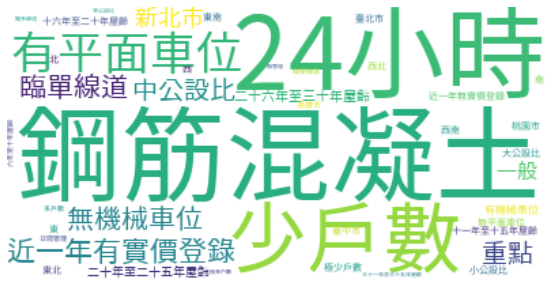

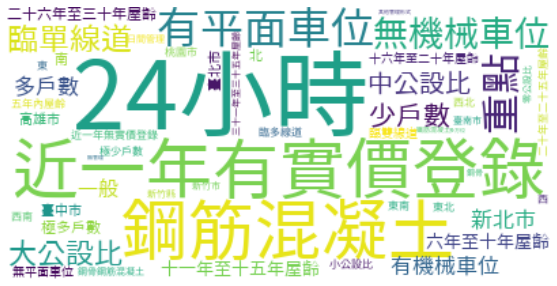

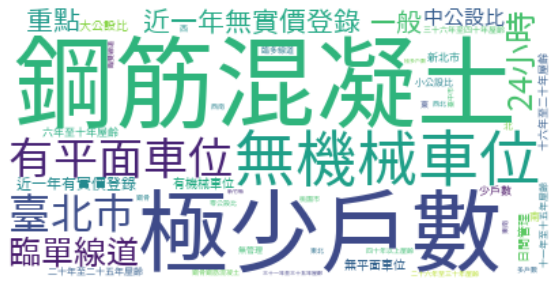

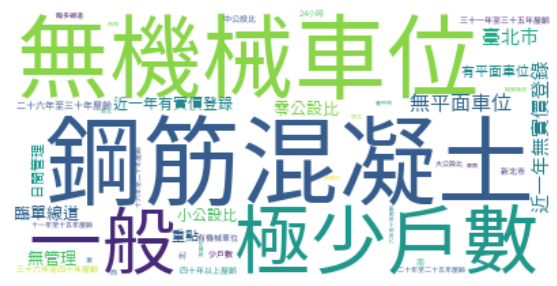

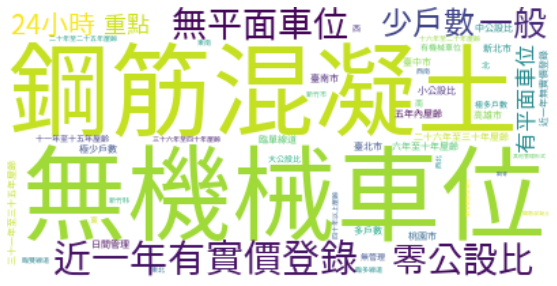

In [ ]:
complete5_1 = clusterdf(cluster_complete_5,'cluster_complete_5',1)
complete5_2 = clusterdf(cluster_complete_5,'cluster_complete_5',2)
complete5_3 = clusterdf(cluster_complete_5,'cluster_complete_5',3)
complete5_4 = clusterdf(cluster_complete_5,'cluster_complete_5',4)
complete5_5 = clusterdf(cluster_complete_5,'cluster_complete_5',5)

# Cluster 1
print("complete5_1 size: ", len(complete5_1.index))
text_c5_1 = textList(complete5_1)
dict_c5_1 = Counter(text_c5_1)

wordcloud_c5_1 = createWordCloud(dict_c5_1)
wordcloud_c5_1.words_ # check all the words with associated weights
showWordCloud(wordcloud_c5_1)

# Cluster 2
print("complete5_2 size: ", len(complete5_2.index))
text_c5_2 = textList(complete5_2)
dict_c5_2 = Counter(text_c5_2)

wordcloud_c5_2 = createWordCloud(dict_c5_2)
wordcloud_c5_2.words_ # check all the words with associated weights
showWordCloud(wordcloud_c5_2)

# Cluster 3
print("complete5_3 size: ", len(complete5_3.index))
text_c5_3 = textList(complete5_3)
dict_c5_3 = Counter(text_c5_3)

wordcloud_c5_3 = createWordCloud(dict_c5_3)
wordcloud_c5_3.words_ # check all the words with associated weights
showWordCloud(wordcloud_c5_3)

# Cluster 4
print("complete5_4 size: ", len(complete5_4.index))
text_c5_4 = textList(complete5_4)
dict_c5_4 = Counter(text_c5_4)

wordcloud_c5_4 = createWordCloud(dict_c5_4)
wordcloud_c5_4.words_ # check all the words with associated weights
showWordCloud(wordcloud_c5_4)

# Cluster 5
print("complete5_5 size: ", len(complete5_5.index))
text_c5_5 = textList(complete5_5)
dict_c5_5 = Counter(text_c5_5)

wordcloud_c5_5 = createWordCloud(dict_c5_5)
wordcloud_c5_5.words_ # check all the words with associated weights
showWordCloud(wordcloud_c5_5)

###**3.2 Group Average Cluster**

####3 clusters

avg3_1 size:  9241
avg3_2 size:  2517
avg3_3 size:  6438


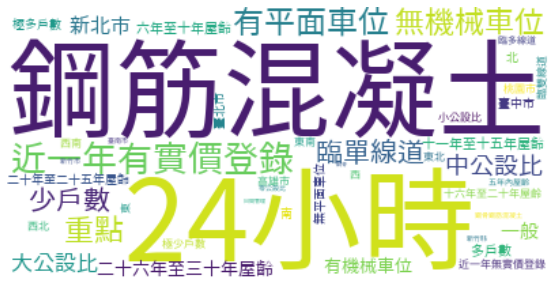

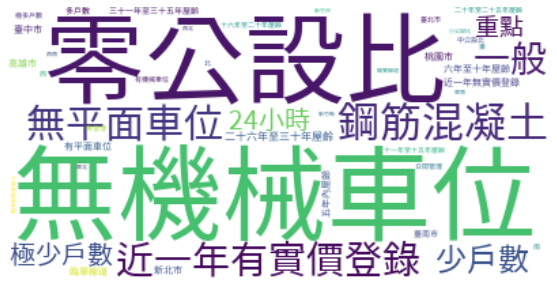

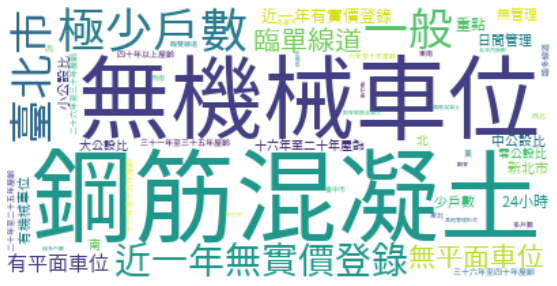

In [ ]:
avg3_1 = clusterdf(cluster_avg_3,'cluster_avg_3',1)
avg3_2 = clusterdf(cluster_avg_3,'cluster_avg_3',2)
avg3_3 = clusterdf(cluster_avg_3,'cluster_avg_3',3)

# Cluster 1
print("avg3_1 size: ", len(avg3_1.index))
text_a3_1 = textList(avg3_1)
dict_a3_1 = Counter(text_a3_1)

wordcloud_a3_1 = createWordCloud(dict_a3_1)
wordcloud_a3_1.words_ # check all the words with associated weights
showWordCloud(wordcloud_a3_1)

# Cluster 2
print("avg3_2 size: ", len(avg3_2.index))
text_a3_2 = textList(avg3_2)
dict_a3_2 = Counter(text_a3_2)

wordcloud_a3_2 = createWordCloud(dict_a3_2)
wordcloud_a3_2.words_ # check all the words with associated weights
showWordCloud(wordcloud_a3_2)

# Cluster 3
print("avg3_3 size: ", len(avg3_3.index))
text_a3_3 = textList(avg3_3)
dict_a3_3 = Counter(text_a3_3)

wordcloud_a3_3 = createWordCloud(dict_a3_3)
wordcloud_a3_3.words_ # check all the words with associated weights
showWordCloud(wordcloud_a3_3)

####6 clusters

avg6_1 size:  5387
avg6_2 size:  3854
avg6_3 size:  2517
avg6_4 size:  2477
avg6_5 size:  2518
avg6_6 size:  1443


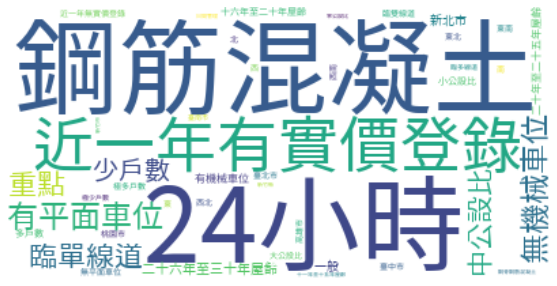

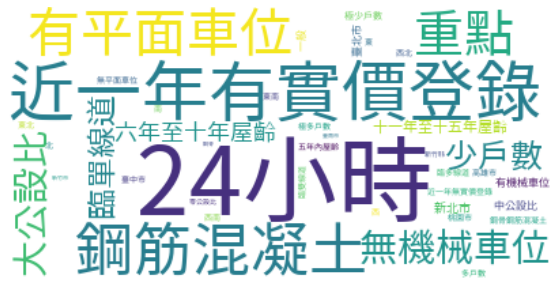

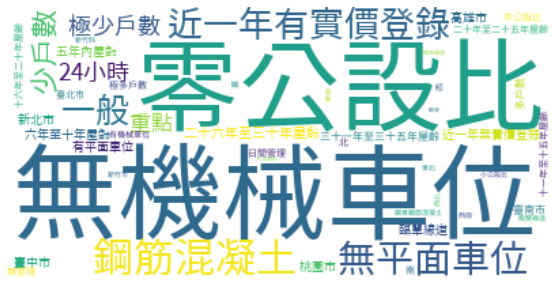

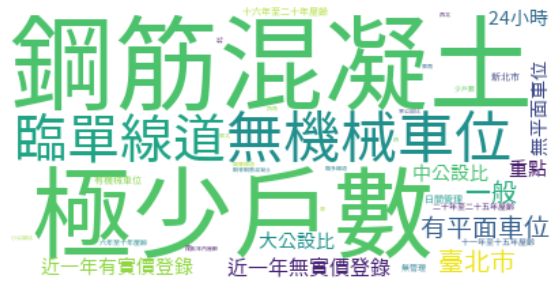

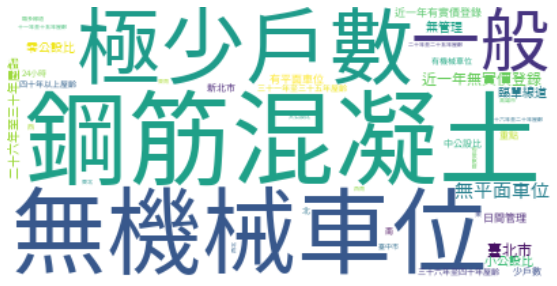

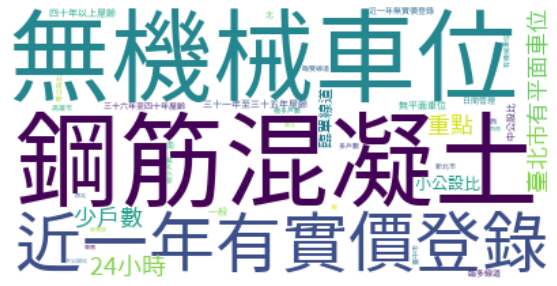

In [ ]:
avg6_1 = clusterdf(cluster_avg_6,'cluster_avg_6',1)
avg6_2 = clusterdf(cluster_avg_6,'cluster_avg_6',2)
avg6_3 = clusterdf(cluster_avg_6,'cluster_avg_6',3)
avg6_4 = clusterdf(cluster_avg_6,'cluster_avg_6',4)
avg6_5 = clusterdf(cluster_avg_6,'cluster_avg_6',5)
avg6_6 = clusterdf(cluster_avg_6,'cluster_avg_6',6)

# Cluster 1
print("avg6_1 size: ", len(avg6_1.index))
text_a6_1 = textList(avg6_1)
dict_a6_1 = Counter(text_a6_1)

wordcloud_a6_1 = createWordCloud(dict_a6_1)
wordcloud_a6_1.words_ # check all the words with associated weights
showWordCloud(wordcloud_a6_1)

# Cluster 2
print("avg6_2 size: ", len(avg6_2.index))
text_a6_2 = textList(avg6_2)
dict_a6_2 = Counter(text_a6_2)

wordcloud_a6_2 = createWordCloud(dict_a6_2)
wordcloud_a6_2.words_ # check all the words with associated weights
showWordCloud(wordcloud_a6_2)

# Cluster 3
print("avg6_3 size: ", len(avg6_3.index))
text_a6_3 = textList(avg6_3)
dict_a6_3 = Counter(text_a6_3)

wordcloud_a6_3 = createWordCloud(dict_a6_3)
wordcloud_a6_3.words_ # check all the words with associated weights
showWordCloud(wordcloud_a6_3)

# Cluster 4
print("avg6_4 size: ", len(avg6_4.index))
text_a6_4 = textList(avg6_4)
dict_a6_4 = Counter(text_a6_4)

wordcloud_a6_4 = createWordCloud(dict_a6_4)
wordcloud_a6_4.words_ # check all the words with associated weights
showWordCloud(wordcloud_a6_4)

# Cluster 5
print("avg6_5 size: ", len(avg6_5.index))
text_a6_5 = textList(avg6_5)
dict_a6_5 = Counter(text_a6_5)

wordcloud_a6_5 = createWordCloud(dict_a6_5)
wordcloud_a6_5.words_ # check all the words with associated weights
showWordCloud(wordcloud_a6_5)

# Cluster 6
print("avg6_6 size: ", len(avg6_6.index))
text_a6_6 = textList(avg6_6)
dict_a6_6 = Counter(text_a6_6)

wordcloud_a6_6 = createWordCloud(dict_a6_6)
wordcloud_a6_6.words_ # check all the words with associated weights
showWordCloud(wordcloud_a6_6)

###**3.3 Ward Cluster**

####3 clusters

ward3_1 size:  9866
ward3_2 size:  4141
ward3_3 size:  4189


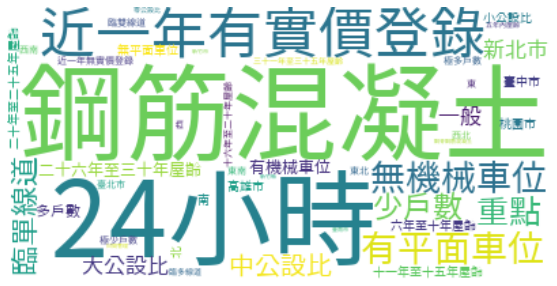

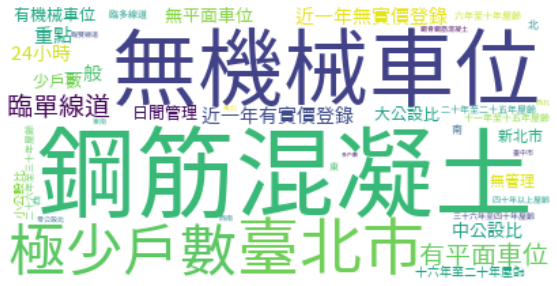

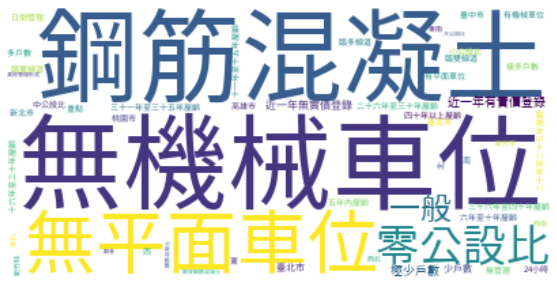

In [ ]:
ward3_1 = clusterdf(cluster_ward_3,'cluster_ward_3',1)
ward3_2 = clusterdf(cluster_ward_3,'cluster_ward_3',2)
ward3_3 = clusterdf(cluster_ward_3,'cluster_ward_3',3)

# Cluster 1
print("ward3_1 size: ", len(ward3_1.index))
text_w3_1 = textList(ward3_1)
dict_w3_1 = Counter(text_w3_1)

wordcloud_w3_1 = createWordCloud(dict_w3_1)
wordcloud_w3_1.words_ # check all the words with associated weights
showWordCloud(wordcloud_w3_1)

# Cluster 2
print("ward3_2 size: ", len(ward3_2.index))
text_w3_2 = textList(ward3_2)
dict_w3_2 = Counter(text_w3_2)

wordcloud_w3_2 = createWordCloud(dict_w3_2)
wordcloud_w3_2.words_ # check all the words with associated weights
showWordCloud(wordcloud_w3_2)

# Cluster 3
print("ward3_3 size: ", len(ward3_3.index))
text_w3_3 = textList(ward3_3)
dict_w3_3 = Counter(text_w3_3)

wordcloud_w3_3 = createWordCloud(dict_w3_3)
wordcloud_w3_3.words_ # check all the words with associated weights
showWordCloud(wordcloud_w3_3)


####4 clusters

ward4_1 size:  3861
ward4_2 size:  6005
ward4_3 size:  4141
ward4_4 size:  4189


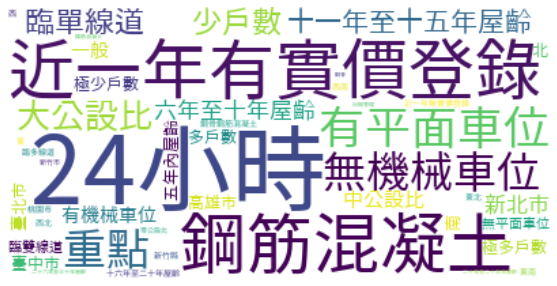

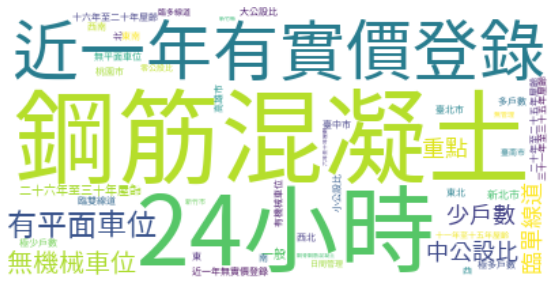

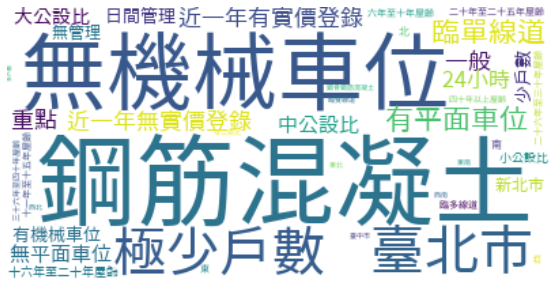

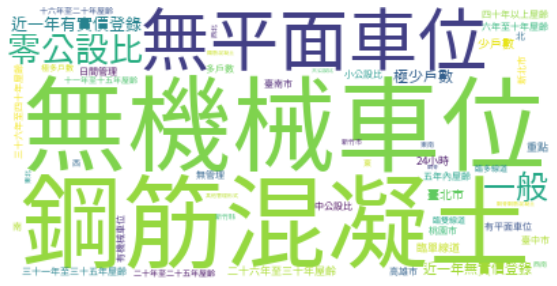

In [ ]:
ward4_1 = clusterdf(cluster_ward_4,'cluster_ward_4',1)
ward4_2 = clusterdf(cluster_ward_4,'cluster_ward_4',2)
ward4_3 = clusterdf(cluster_ward_4,'cluster_ward_4',3)
ward4_4 = clusterdf(cluster_ward_4,'cluster_ward_4',4)

# Cluster 1
print("ward4_1 size: ", len(ward4_1.index))
text_w4_1 = textList(ward4_1)
dict_w4_1 = Counter(text_w4_1)

wordcloud_w4_1 = createWordCloud(dict_w4_1)
wordcloud_w4_1.words_ # check all the words with associated weights
showWordCloud(wordcloud_w4_1)

# Cluster 2
print("ward4_2 size: ", len(ward4_2.index))
text_w4_2 = textList(ward4_2)
dict_w4_2 = Counter(text_w4_2)

wordcloud_w4_2 = createWordCloud(dict_w4_2)
wordcloud_w4_2.words_ # check all the words with associated weights
showWordCloud(wordcloud_w4_2)

# Cluster 3
print("ward4_3 size: ", len(ward4_3.index))
text_w4_3 = textList(ward4_3)
dict_w4_3 = Counter(text_w4_3)

wordcloud_w4_3 = createWordCloud(dict_w4_3)
wordcloud_w4_3.words_ # check all the words with associated weights
showWordCloud(wordcloud_w4_3)

# Cluster 4
print("ward4_4 size: ", len(ward4_4.index))
text_w4_4 = textList(ward4_4)
dict_w4_4 = Counter(text_w4_4)

wordcloud_w4_4 = createWordCloud(dict_w4_4)
wordcloud_w4_4.words_ # check all the words with associated weights
showWordCloud(wordcloud_w4_4)


##**4. Cluster Comparison by Weights**


---



In [ ]:
def feature_weight(cluster1, cluster2, cluster3):
  # df1 = pd.DataFrame(list(cluster1.words_.items()),columns=['Feature', 'cluster 1'])
  df1 = pd.DataFrame.from_dict(cluster1, orient='index').rename(columns={0:'cluster 1'})
  df2 = pd.DataFrame.from_dict(cluster2, orient='index').rename(columns={0:'cluster 2'})
  df3 = pd.DataFrame.from_dict(cluster3, orient='index').rename(columns={0:'cluster 3'})
  return pd.concat([df1, df2, df3], axis=1) # order by df1 weights
  # order by feature character
  # df = df1.join(df2, how='outer')
  # return df.join(df3, how='outer')

In [ ]:
# Complete-Link
df_c3 = feature_weight(wordcloud_c3_1.words_, wordcloud_c3_2.words_, wordcloud_c3_3.words_)
df_c3.to_excel("/content/gdrive/My Drive/碩一下/Capstone/hierarchical_clustering/complete3.xlsx")
print("Complete-Link: ")
df_c3

Complete-Link: 


,cluster 1,cluster 2,cluster 3
24小時,1.000000,0.612762,0.328346
鋼筋混凝土,0.991511,1.000000,1.000000
近一年有實價登錄,0.939445,0.517292,0.616846
有平面車位,0.904697,0.748173,0.291863
無機械車位,0.779740,0.773015,0.962845
重點,0.762309,0.574769,0.308507
臨單線道,0.629542,0.632733,0.348689
少戶數,0.595246,0.228446,0.401648
中公設比,0.509338,0.532392,0.148621
大公設比,0.388795,0.339990,0.085743


In [ ]:
# Group Average
df_a3 = feature_weight(wordcloud_a3_1.words_, wordcloud_a3_2.words_, wordcloud_a3_3.words_)
df_a3.to_excel("/content/gdrive/My Drive/碩一下/Capstone/hierarchical_clustering/average3.xlsx")
print("Group Average: ")
df_a3

Group Average: 


,cluster 1,cluster 2,cluster 3
24小時,1.000000,0.331679,0.401945
鋼筋混凝土,0.971036,0.885856,1.000000
近一年有實價登錄,0.908564,0.822581,0.501318
有平面車位,0.881758,0.162531,0.512525
無機械車位,0.776238,1.000000,0.815920
重點,0.742390,0.278329,0.419084
臨單線道,0.606429,0.148470,0.533619
少戶數,0.578146,0.525641,0.289222
中公設比,0.485120,0.062862,0.338332
大公設比,0.381190,0.010339,0.208306


In [ ]:
# Ward
df_w3 = feature_weight(wordcloud_w3_1.words_, wordcloud_w3_2.words_, wordcloud_w3_3.words_)
df_w3.to_excel("/content/gdrive/My Drive/碩一下/Capstone/hierarchical_clustering/ward3.xlsx")
print("Ward: ")
df_w3

Ward: 


,cluster 1,cluster 2,cluster 3
鋼筋混凝土,1.000000,1.000000,0.936224
24小時,0.986680,0.486255,0.270663
近一年有實價登錄,0.916829,0.551089,0.622704
有平面車位,0.879251,0.622925,0.190051
無機械車位,0.806043,0.736515,1.000000
重點,0.711501,0.543828,0.276531
臨單線道,0.611003,0.605550,0.244388
少戶數,0.586311,0.320539,0.374235
中公設比,0.496535,0.423755,0.065816
新北市,0.360949,0.257002,0.184949
